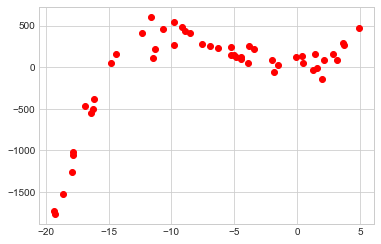

In [126]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Display data
plt.style.use('seaborn-whitegrid')
noise_scale = 100
num_of_samp = 50
x = 25*(np.random.rand(num_of_samp,1) - 0.8)                                      # x[rand Real values]
y = 7 * x + 15 * x**2 + 1 * x**3 + noise_scale*np.random.randn(num_of_samp,1)     # Simulated dataset
plt.plot(x,y,'ro')

# Make population of random hypotheses
pop = np.zeros((8,8))
degrees = np.arange(1,9,1)
x = x.flatten()
y = y.flatten()

# Split Data 80:20 (Train:Test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# fill pop[] with hypotheses
for i in range(1,9):
    p = np.polyfit(x, y, i)
    for j in range(p.size):
        pop[i-1][j] = p[j]
        if i == 8:
            break

In [127]:
# Genetic Operator Definitions
# Uniform Random Crossover
def ranCrossover(os, os1):
    mutation = [0]*8
    crossoverPoint = np.random.choice([0,1], size=(8,))   
    for i in range(8):
        if crossoverPoint[i] == 1:
            mutation[i] = os[i]
        else:
            mutation[i] = os1[i]
    return mutation

# Mutation
def mutation(population):
    allele1, allele2 = random.randint(1,9), random.randint(1,9)
    new_pop = population[allele1:allele2+1].reverse()
    np.insert(new_pop, 0, population[0:allele1])
    np.append(new_pop, population[allele2:])
    return new_pop 

# Fitness Function; lower is better
def fit_func(population, x_test, y_test):
    fitness_arr = []
    tot_fitness = 0
    for i in population:
        z = np.poly1d(i)
        mse = np.square(np.subtract(y_test,z(x_test))).mean()
        fitness_arr.append(mse)
        tot_fitness = tot_fitness + mse
    fitness_arr = fitness_arr/tot_fitness
    return fitness_arr

# Genetic Algorithm
# Max fitness: lower = max
def GA(population, Fitness_threshold, p,r, m, x_test, y_test):
    mutateSwitch = 0
    max_fitness = Fitness_threshold + 1
    selection = (1-r)*p
    # Learning 
    while max_fitness > Fitness_threshold:
        # Create new generation
        newPop = np.zeros(np.shape(population))
        fitnesses = fit_func(population, x_test, y_test)
        max_fitness = min(fitnesses)
        min_fitness = max(fitnesses)
        index_max = np.where(fitnesses == min_fitness)
        index_min = np.where(fitnesses == max_fitness)
        nextGen = random.choices(np.arange(1,9,1), weights=fitnesses)
        for i in nextGen:
            newPop[i-1] = pop[i-1]
        offspring, offspring1 = random.choices(population, weights=fitnesses, k=2)
        offspring = ranCrossover(offspring, offspring1)  
        mutateSwitch = np.random.choice([0,1], p=[1-m,m])
        if mutateSwitch == 1:
            offspring = mutation(offspring)
        newPop[index_min] = offspring
        for j in newPop:
            if j not in population:
                population[index_min] = j
#        fit_func(pop, x_test, y_test)
    fitnesses = fit_func(population, x_test, y_test)
    index_min = np.where(fitnesses == max_fitness)
    print(population[index_min])
    poly = population[index_min].flatten()
    answer = np.poly1d(poly)
    return answer

[[-1.61322850e-05 -3.80178156e-04  5.58814407e-03  1.77186853e-01
   1.56841527e+00  8.73251557e+00 -7.68552806e+00  2.69167966e+01]]
            7             6            5          4         3         2
-1.613e-05 x - 0.0003802 x + 0.005588 x + 0.1772 x + 1.568 x + 8.733 x - 7.686 x + 26.92


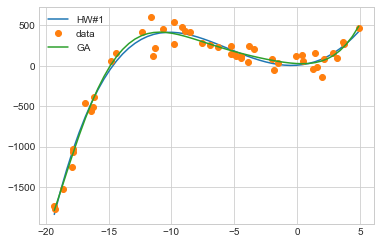

In [130]:
coeff = GA(pop, 1e-13, 8, 0.25, 0.001, x_test, y_test)
print(coeff)
new_x = np.linspace(min(x), max(x))
new_y = coeff(new_x)
old_coeff = np.polyfit(x,y,4)
old_poly = np.poly1d(old_coeff)
plt.plot(new_x, old_poly(new_x), label='HW#1')
plt.plot(x, y, "o", label = 'data')
plt.plot(new_x, new_y, label='GA')
plt.legend()
plt.show()